Dimensions of y before reshaping:  (139,)
Dimensions of X before reshaping:  (139,)
Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 1)


Text(0.5, 1.0, 'Dataframe heatmap')

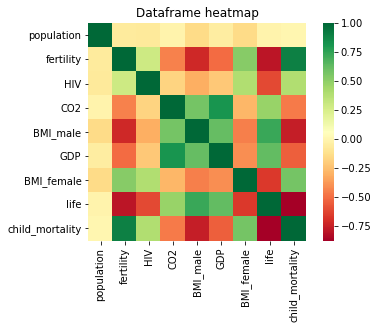

In [11]:
#CHAPTER 2 - REGRESSION

# Import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Read the CSV file into a DataFrame: df
df = pd.read_csv('Dados/gm_2008_region.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

# Reshape X and y
y_reshaped = y.reshape(-1,1)
X_reshaped = X.reshape(-1,1) 

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

# Mapa de calor - Seaborn's heatmap function
s= sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
s.set_title("Dataframe heatmap")

R^2 (prediction space, y_pred): 1.0
R^2 (X_fertility,y): 0.6192442167740035


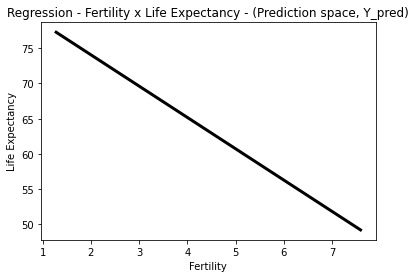

In [3]:
# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
X_fertility = X_reshaped
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility,y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print('R^2 (prediction space, y_pred): {}'.format(reg.score(prediction_space, y_pred)))
print('R^2 (X_fertility,y): {}'.format(reg.score(X_fertility,y)))

# Plot regression line
plt.figure()
plt.title('Regression - Fertility x Life Expectancy - (Prediction space, Y_pred)')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


In [4]:
# Train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_fertility, y, test_size =0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2 (X_test, y_test): {}".format(reg_all.score(X_test, y_test)))
#mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (y_test,y_pred): {}".format(rmse))

R^2 (X_test, y_test): 0.7298987360907498
Root Mean Squared Error (y_test,y_pred): 4.194027914110239


In [5]:
#CROSSVALIDATION

# Create a linear regression object: reg_cv
reg_cv_5 = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_5 = cross_val_score(reg_cv_5, X_fertility, y, cv=5)

# Print the 5-fold cross-validation scores
print("CrossValidation Score (5-Fold): : {}".format(cv_scores_5))
print("Average 5-Fold CrossValidation Score: {}".format(np.mean(cv_scores_5)))


# Create a linear regression object: reg
reg_t= LinearRegression()

# Perform 3-fold CV
cv_scores_3 =  cross_val_score(reg_t,X_fertility,y,cv=3)
print("Average 3-Fold CrossValidation Score: {}".format(np.mean(cv_scores_3)))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg_t,X_fertility,y,cv=10)
print("Average 10-Fold CrossValidation Score: {}".format(np.mean(cvscores_10)))

print("Timeit 3-Fold CrossValidation")
%timeit cross_val_score(reg_t,X_fertility,y,cv=3)
print("Timeit 10-Fold CrossValidation")
%timeit cross_val_score(reg_t,X_fertility,y,cv=10)


CrossValidation Score (5-Fold): : [0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CrossValidation Score: 0.6168819644425119
Average 3-Fold CrossValidation Score: 0.6294715754653507
Average 10-Fold CrossValidation Score: 0.5883937741571185
Timeit 3-Fold CrossValidation
5.81 ms ± 715 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Timeit 10-Fold CrossValidation
14.5 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Lasso coefficients: [-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


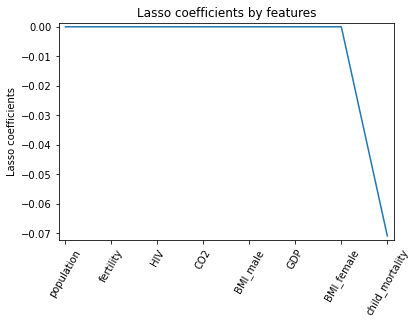

In [6]:
# Regularizade Regression (LASSO)

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

#Define X
X_all = df.drop(columns=['life', 'Region'])

# Fit the regressor to the data
lasso.fit(X_all,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print("Lasso coefficients: {}".format(lasso_coef))

# Plot the coefficients
plt.figure()
plt.title('Lasso coefficients by features')
plt.ylabel('Lasso coefficients')
plt.plot(range(len(X_all.columns)), lasso_coef)
plt.xticks(range(len(X_all.columns)), X_all.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

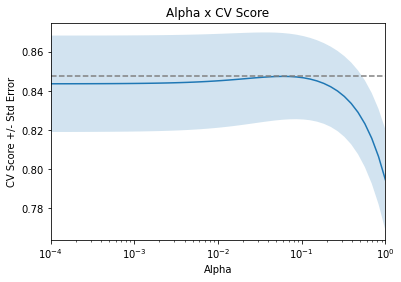

In [7]:
# Regularizade Regression (RIDGE)

def display_plot(cv_scores, cv_scores_std, alpha_space):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.title("Alpha x CV Score")
    plt.show()

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X_all,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std,alpha_space)